In [1]:
import pandas as pd
import numpy as np
Data=pd.read_csv("data.csv", encoding = 'UTF-8')
Time=pd.read_csv("holiday.csv",encoding='UTF-8')

# Part I

## Problem 1

In [2]:
print('The time span of the order data is',Data['dt'].min(),"to" ,Data['dt'].max())

The time span of the order data is 2019-01-20 to 2019-03-01


## Problem 2

In [3]:
Datasize=Data.groupby(['dt']).size().reset_index(name='Sales')
Datasize

,dt,Sales
0,2019-01-20,69859
1,2019-01-21,117686
2,2019-01-22,118409
3,2019-01-23,126331
4,2019-01-24,125764
5,2019-01-25,122092
6,2019-01-26,77779
7,2019-01-27,66399
8,2019-01-28,106025
9,2019-01-29,104704


### Problem 2a

In [4]:
DataTime=pd.merge(Datasize,Time,on='dt')
DataTime.groupby('weekday')['Sales'].mean().reset_index(name='average_sales')

,weekday,average_sales
0,1,62903.000000
1,2,62767.500000
2,3,64671.166667
3,4,63883.500000
4,5,62362.000000
5,6,42426.800000
6,7,40033.000000


For average sales on weekdays are more than those on weekends different strageties are needed.

## Problem 3

In [5]:
print('The number of users is',len(Data.groupby('member_id').count()))

The number of users is 466886


In [4]:
len(np.unique(Data.member_id))

466886

## Problem 4

In [6]:
LargestSales=Data.groupby('commodity_name').size().sort_values(ascending=False).head(10).reset_index(name='Sales')
LargestSales

,commodity_name,Sales
0,拿铁,425514
1,榛果拿铁,219627
2,澳瑞白,155506
3,标准美式,148666
4,香草拿铁,136841
5,卡布奇诺,115475
6,摩卡,113754
7,加浓美式,110526
8,焦糖玛奇朵,105081
9,焦糖拿铁,81120


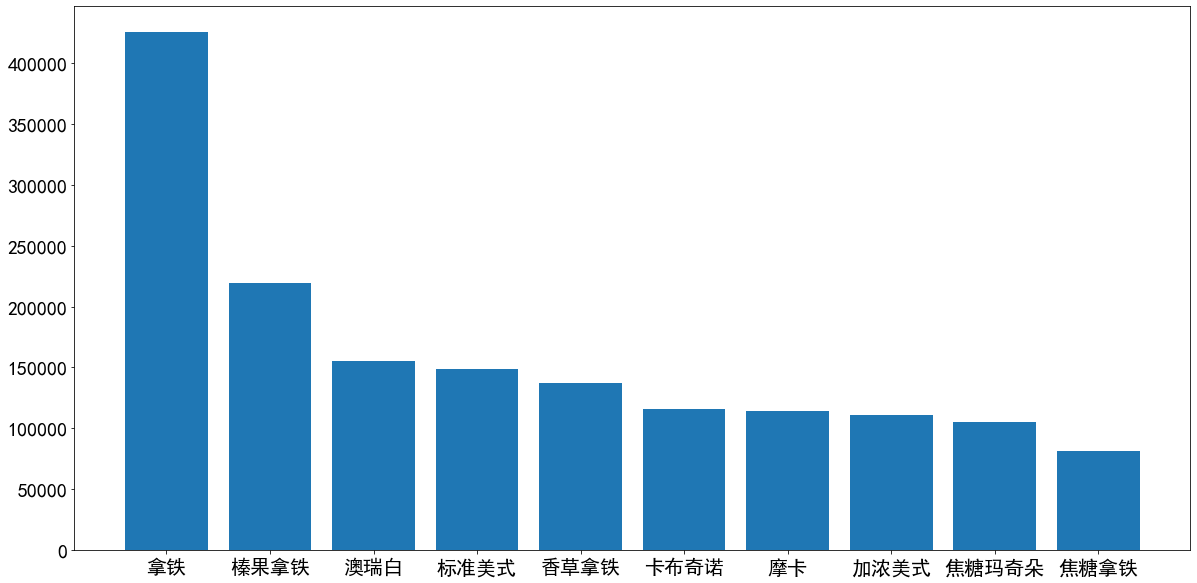

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.rcParams['font.sans-serif']=['SimHei']
plt.bar(LargestSales['commodity_name'], LargestSales['Sales'],)
#plt.xlabel('commodity_name',size=25)
#plt.ylabel('sales',size=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Problem 5

In [2]:
#Data['discount_rate']=(Data['commodity_income']-Data['coffeestore_share_money'] )/ Data['commodity_origin_money']
#Data['discount_rate']=(Data['commodity_origin_money']-Data['coupon_money'] )/ Data['commodity_origin_money']
#Data['discount_rate']=(Data['pay_money'] )/ Data['commodity_origin_money']
Data['discount_rate']=(Data['commodity_income'] )/ Data['commodity_origin_money']
Data.head()

,Unnamed: 0,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48


## Problem 6

In [16]:
Time['t']=range(len(Time))
DataTime=pd.merge(Data,Time,on='dt')

In [10]:
Temp=(DataTime.groupby(['week_of_year'])['weekday'].max()-DataTime.groupby(['week_of_year'])['weekday'].min()>=6)
Temp1=Temp[Temp].reset_index(name='')
DataTime[(DataTime['week_of_year'].isin(Temp1['week_of_year']))].groupby('week_of_year')['discount_rate'].mean().reset_index(name='average_discount')

,week_of_year,average_discount
0,4,0.397794
1,5,0.419427
2,6,0.368075
3,7,0.489334
4,8,0.486613


## Problem 7

In [8]:
def retention_rate(dt1, dt2):
    data1=Data[Data['dt']==dt1]
    data2=Data[Data['dt']==dt2]
    print('The Retention Rate of',dt1,'is',len(pd.merge(data1,data2,on='member_id').groupby('member_id').count())/len(data1.groupby('member_id').count()))
    #Another solution:
    #twodays_one=data1['member_id'].loc[data1['member_id'].isin(data2['member_id'])]
    #len(Data[Data['member_id'].isin(twodays_one)].groupby('member_id').count())/len(data1.groupby('member_id').count())
    return
retention_rate('2019-01-23','2019-01-24')
retention_rate('2019-02-01','2019-02-02')
retention_rate('2019-02-06','2019-02-07')
retention_rate('2019-02-12','2019-02-13')
retention_rate('2019-02-20','2019-02-21')

The Retention Rate of 2019-01-23 is 0.22776001023410516
The Retention Rate of 2019-02-01 is 0.15790891424393436
The Retention Rate of 2019-02-06 is 0.07273779664287093
The Retention Rate of 2019-02-12 is 0.25808207990199417
The Retention Rate of 2019-02-20 is 0.27187063404773937


## Problem 8

In [12]:
RequiredTime='2019-02-01'
t=Time.loc[Time['dt']==RequiredTime,'t'].values[0]
Temp=DataTime[DataTime['dt']==RequiredTime]
Temp2=DataTime[DataTime['t']==t+1]
for i in range(6):
    Temp1=DataTime[DataTime['t']==t+i+2]
    Temp2=pd.concat([Temp1,Temp2])
print('The Week Retention Rate of',RequiredTime,'is',len(Temp[Temp['member_id'].isin(Temp2['member_id'])].groupby('member_id').size())/len(Temp.groupby('member_id').size()))

The Week Retention Rate of 2019-02-01 is 0.24204875608489024


## Problem 9

In [3]:
DataTime=pd.merge(DataTime,DataTime.groupby('member_id')['t'].min().reset_index(name='min_t'),on='member_id')

In [14]:
RequiredTime='2019-02-01'
t=Time.loc[Time['dt']==RequiredTime,'t'].values[0]
Temp=DataTime[DataTime['min_t']==t]
Temp2=Temp[Temp['t']==t+1]
for i in range(6):
    Temp1=Temp[Temp['t']==t+i+2]
    Temp2=pd.concat([Temp1,Temp2])
print('The Week Retention Rate of',RequiredTime,'for new users is',len(Temp2.groupby('member_id').size())/len(Temp.groupby('member_id').size()))

The Week Retention Rate of 2019-02-01 for new users is 0.10063540090771558


## Problem 10

In [4]:
DataTime=pd.merge(DataTime,DataTime.groupby('member_id')['week_of_year'].min().reset_index(name='min_week'),on='member_id')

In [16]:
RequireWeek=6
Temp=DataTime[DataTime['min_week']==RequireWeek]
len(Temp[Temp['t']!=Temp['min_t']].groupby('member_id').size())/len(Temp.groupby('member_id').size())

0.24856689840224416

## Problem 11

In [9]:
Temp=Data.groupby(['member_id'])['member_id'].count()>=5
active_users=Data[Data['member_id'].isin((Temp[Temp].reset_index(name=''))['member_id'])].groupby('member_id').size().reset_index(name='number_of_orders')
active_users

,member_id,number_of_orders
0,1525,7
1,1533,12
2,1557,50
3,1574,24
4,1575,139
...,...,...
166303,97945667,8
166304,97946290,6
166305,97946934,7
166306,97950455,6


## Problem 12

In [18]:
active_users.to_csv('ActiveUser.csv')

## Problem 13

In [19]:
active_users['number_of_orders'].describe()

count    166308.000000
mean         10.418188
std           7.599244
min           5.000000
25%           6.000000
50%           8.000000
75%          12.000000
max         585.000000
Name: number_of_orders, dtype: float64

In [12]:
print("range:",active_users['number_of_orders'].max()-active_users['number_of_orders'].min(),
      "\nstd:",active_users['number_of_orders'].std(),
      "\nvariance:",active_users['number_of_orders'].var(),
      "\nskewness:",active_users['number_of_orders'].skew(),
      "\nkurtosis:",active_users['number_of_orders'].kurt())

range: 580 
std: 7.599244204561085 
variance: 57.74851248055524 
skewness: 6.542468770976487 
kurtosis: 241.3579866155422


# Part 2

## Problem 1

In [3]:
Data=Data.drop(columns=['Unnamed: 0'])
Data.head()

,Unnamed: 0.1,dt,phone_no,member_id,commodity_code,commodity_name,commodity_origin_money,coupon_id,coupon_money,one_category_name,two_category_name,commodity_income,pay_money,coffeestore_share_money,discount_rate
0,0,2019-01-25,13901387938,14442,SP025,榛果拿铁,27.0,7045.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
1,1,2019-01-27,13901387938,14442,SP209,NFC鲜榨橙汁,24.0,NaN,0.00,饮品,鲜榨果蔬汁,0.00,0.00,0.0,0.00
2,2,2019-01-23,13901387938,14442,SP025,榛果拿铁,27.0,5589.0,22.14,饮品,现磨咖啡,4.86,4.86,0.0,0.18
3,3,2019-02-01,13901387938,14442,SP025,榛果拿铁,27.0,6604.0,19.44,饮品,现磨咖啡,7.56,7.56,0.0,0.28
4,4,2019-01-27,13901387938,14442,SP010,巧克力瑞纳冰,27.0,6947.0,14.04,饮品,瑞纳冰,12.96,12.96,0.0,0.48


## Problem 2

In [15]:
Data['count']=1
Data.pivot_table(values='count',index='phone_no',columns='commodity_name',aggfunc=np.sum,fill_value=0)

commodity_name,NFC鲜榨橙汁,NFC鲜榨芒果汁,NFC鲜榨芒果混合果汁,NFC鲜榨荔枝汁,NFC鲜榨蓝莓草莓混合果汁,依云矿泉水330ml,加浓美式,卡布奇诺,卡布奇诺瑞纳冰,土豆烧牛方饭,...,蜜汁叉烧包,金枪鱼谷物沙拉,陈皮普洱,香椰提子麦芬,香草拿铁,香蕉核桃麦芬,鱼香茄子饭,鸡蛋马铃薯双拼三明治,黑森林蛋糕,黑金气泡美式
phone_no,,,,,,,,,,,,,,,,,,,,,
51379898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57047978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61120518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62288158,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64618166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997912482,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999208056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999597999,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,2,0


## Problem 3

In [17]:
Data['temp']=DataTime['t']-DataTime['t'].min()-1
Data['period']=((Data[Data['temp']>=0]['temp'])/2).astype(DataTime['t'].dtypes)
Data['period']=Data['period'].fillna(value=-1).astype(DataTime['t'].dtypes)
Table=Data.pivot_table(values='count',index='phone_no',columns='period',aggfunc=np.sum,fill_value=0)
Table

period,-1,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
phone_no,,,,,,,,,,,,,,,,,,,,,
51379898,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57047978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61120518,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62288158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
64618166,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997912482,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999208056,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999597999,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


# Part 3

## Problem 1

In [18]:
Data_train=Table.values
Data_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Problem 2

In [19]:
X,y=Data_train[:,1:20],Data_train[:,20]
X[X>0]=1
y[y>0]=1
print(X,y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0 0 0 ... 0 0 0]


## Problem 3

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
AdaBoost_clf = AdaBoostClassifier(n_estimators=10)
scores_ab=cross_validate(AdaBoost_clf,X,y,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
#scores_ab = cross_val_score(AdaBoost_clf,X,y,cv=3,scoring='f1_micro')
scores_ab

{'fit_time': array([2.54736876, 2.19713449, 2.21491885]),
 'score_time': array([0.79814291, 0.68763232, 0.66496348]),
 'test_precision': array([0.58438614, 0.60265655, 0.59548483]),
 'train_precision': array([0.59571403, 0.59073291, 0.59404528]),
 'test_recall': array([0.08337185, 0.07338941, 0.07435992]),
 'train_recall': array([0.0764396 , 0.07747943, 0.07699418]),
 'test_f1': array([0.14592518, 0.13084497, 0.13221035]),
 'train_f1': array([0.13549325, 0.13699134, 0.13631993]),
 'test_roc_auc': array([0.67472828, 0.67230932, 0.6672237 ]),
 'train_roc_auc': array([0.66977332, 0.67105935, 0.67341974])}

In [12]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
scores_rf = cross_validate(random_forest,X,y,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
scores_rf

{'fit_time': array([2.61985803, 2.73305416, 2.69169474]),
 'score_time': array([0.74346805, 0.75878429, 0.75463295]),
 'test_precision': array([0.52042571, 0.54566236, 0.55196458]),
 'train_precision': array([0.79207003, 0.79425961, 0.79196833]),
 'test_recall': array([0.22372678, 0.22063037, 0.23047417]),
 'train_recall': array([0.3554395 , 0.35361401, 0.35134948]),
 'test_f1': array([0.31292825, 0.31421331, 0.32517198]),
 'train_f1': array([0.49068521, 0.48935932, 0.4867547 ]),
 'test_roc_auc': array([0.71135355, 0.72000782, 0.72271328]),
 'train_roc_auc': array([0.81704368, 0.8160003 , 0.81591073])}

### Problem 3a

In [38]:
y_train=y.reshape((len(y),1))

In [39]:
ytrain=xgb.DMatrix(y_train)

In [40]:
Xtrain=xgb.DMatrix(X)

In [41]:
xgtrain = xgb.DMatrix(X, label=y_train)

In [13]:
import xgboost as xgb
Xgboost_clf=xgb.XGBClassifier()
scores_xb=cross_validate(Xgboost_clf,X,y,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
scores_xb

{'fit_time': array([12.37117147, 12.77863503, 13.29705453]),
 'score_time': array([0.70773005, 0.77293205, 0.76558471]),
 'test_precision': array([0.59081293, 0.61462523, 0.59674628]),
 'train_precision': array([0.60746874, 0.60185492, 0.60934326]),
 'test_recall': array([0.09035031, 0.0776874 , 0.07967465]),
 'train_recall': array([0.08307145, 0.08397264, 0.08318699]),
 'test_f1': array([0.15673227, 0.13793952, 0.14057977]),
 'train_f1': array([0.14615604, 0.14738208, 0.14638907]),
 'test_roc_auc': array([0.70328885, 0.70298976, 0.69881075]),
 'train_roc_auc': array([0.70371226, 0.70281743, 0.70284716])}

### Problem 3b

In [65]:
from sklearn import svm
C=1.0
svm=svm.SVC(kernel='linear', C=C)
scores_svm=cross_validate(svm,X,y,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
#svm_models = (svm.SVC(kernel='linear', C=C),
#          svm.LinearSVC(C=C, max_iter=10000),
 #         svm.SVC(kernel='rbf', gamma=0.7, C=C),
  #        svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
#svm_scores = ([cross_val_score(clf,X,y,cv=3,scoring='f1_micro') for clf in svm_models])
#svm_scores
scores_svm

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision 

{'fit_time': array([1030.33232379,  828.24622655,  956.73672414]),
 'score_time': array([461.79688668, 429.17135525, 493.93736029]),
 'test_precision': array([0., 0., 0.]),
 'train_precision': array([0., 0., 0.]),
 'test_recall': array([0., 0., 0.]),
 'train_recall': array([0., 0., 0.]),
 'test_f1': array([0., 0., 0.]),
 'train_f1': array([0., 0., 0.]),
 'test_roc_auc': array([0.42880409, 0.5514885 , 0.4754973 ]),
 'train_roc_auc': array([0.42948885, 0.5523388 , 0.47596717])}

In [66]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
scores_nb = cross_validate(naive_bayes,X,y,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
scores_nb

{'fit_time': array([0.33388329, 0.27009702, 0.25514674]),
 'score_time': array([0.57806826, 0.52325034, 0.5541482 ]),
 'test_precision': array([0.28175948, 0.29182879, 0.29055138]),
 'train_precision': array([0.28802354, 0.28778094, 0.28783842]),
 'test_recall': array([0.40733894, 0.37434144, 0.37674462]),
 'train_recall': array([0.38455495, 0.38612626, 0.38693502]),
 'test_f1': array([0.33310658, 0.32797506, 0.3280813 ]),
 'train_f1': array([0.32936194, 0.32977768, 0.3301101 ]),
 'test_roc_auc': array([0.64618994, 0.64182697, 0.63506879]),
 'train_roc_auc': array([0.63830394, 0.64047715, 0.64440084])}

SVM is so time-consuming that if your sample is too large, it will take you a long time to train and fit the model. Also, SVM is sentitive to missing data. For this data set, it might not contain the data with some specific features. As a result, the model may send you the message that there is something wrong with your data. The data is a time-series data. While the assumption in Naive Bayes is that the features conditioned on the label is conditional independent and time-series data usually oppose the assumption. Thus, Naive Bayes may not be a good choice.

In [ ]:
from sklearn.metrics import confusion_matrix
y_zero=np.zeros(len(y))
confusion_matrix(y,y_zero)

## Problem 4

In [20]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
print('Original dataset shape {}'.format(Counter(y)))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 441210, 1: 25676})
Resampled dataset shape Counter({0: 441210, 1: 441210})


In [69]:
AdaBoost_clf = AdaBoostClassifier(n_estimators=10)
scores_ab=cross_validate(AdaBoost_clf,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
scores_ab

{'fit_time': array([4.70551157, 4.46606565, 4.48400593]),
 'score_time': array([1.6033349 , 1.48603177, 1.45912194]),
 'test_precision': array([0.6398609 , 0.64925211, 0.64690482]),
 'train_precision': array([0.64802214, 0.64418284, 0.64525341]),
 'test_recall': array([0.56989649, 0.55816106, 0.55506713]),
 'train_recall': array([0.56539829, 0.55990701, 0.56155474]),
 'test_f1': array([0.60285555, 0.60027049, 0.59747751]),
 'train_f1': array([0.60389722, 0.59909564, 0.6005016 ]),
 'test_roc_auc': array([0.65548637, 0.66480153, 0.66199621]),
 'train_roc_auc': array([0.66186521, 0.66100557, 0.66238029])}

In [70]:
random_forest = RandomForestClassifier(n_estimators=10)
scores_rf = cross_validate(random_forest,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
scores_rf

{'fit_time': array([5.52652025, 5.5913043 , 5.58432651]),
 'score_time': array([1.66742539, 1.65247393, 1.76908588]),
 'test_precision': array([0.74025686, 0.76135157, 0.75735671]),
 'train_precision': array([0.77789751, 0.78293475, 0.77877471]),
 'test_recall': array([0.64868536, 0.64760057, 0.65057355]),
 'train_recall': array([0.67342834, 0.65529028, 0.66333061]),
 'test_f1': array([0.69145251, 0.69988426, 0.69991569]),
 'train_f1': array([0.72190298, 0.7134482 , 0.71643187]),
 'test_roc_auc': array([0.78104769, 0.79711168, 0.79456307]),
 'train_roc_auc': array([0.82103918, 0.81628596, 0.8174458 ])}

In [71]:
import xgboost as xgb
Xgboost_clf=xgb.XGBClassifier()
scores_xb=cross_validate(Xgboost_clf,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
scores_xb

{'fit_time': array([28.86149287, 27.72230101, 27.56383109]),
 'score_time': array([1.75115132, 1.71626115, 1.57971859]),
 'test_precision': array([0.6555965 , 0.66701145, 0.66373536]),
 'train_precision': array([0.66390776, 0.66182509, 0.66267034]),
 'test_recall': array([0.55100716, 0.53421151, 0.53175213]),
 'train_recall': array([0.54597154, 0.53593898, 0.53895239]),
 'test_f1': array([0.59876889, 0.5932707 , 0.5904582 ]),
 'train_f1': array([0.59919158, 0.59226666, 0.59444242]),
 'test_roc_auc': array([0.69082682, 0.69783292, 0.69199449]),
 'train_roc_auc': array([0.69737301, 0.69379964, 0.69310145])}

In [72]:
for n in range(101):
    if (n%5==0) & (n!=0):
        print('we are training n = {} model'.format(n))
        AdaBoost_clf = AdaBoostClassifier(n_estimators=n)
        scores_ab=cross_validate(AdaBoost_clf,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
        print(scores_ab)

we are training n = 5 model
{'fit_time': array([2.30330062, 2.51359391, 2.39000893]), 'score_time': array([1.06543541, 1.01161766, 0.9548068 ]), 'test_precision': array([0.64550302, 0.65258773, 0.64948016]), 'train_precision': array([0.65103641, 0.64746288, 0.64899986]), 'test_recall': array([0.53751371, 0.52962908, 0.52543081]), 'train_recall': array([0.52752994, 0.53147226, 0.53357141]), 'test_f1': array([0.58657958, 0.58471413, 0.5809068 ]), 'train_f1': array([0.58281182, 0.58376165, 0.58565226]), 'test_roc_auc': array([0.6544719 , 0.65765511, 0.65485574]), 'train_roc_auc': array([0.65624971, 0.65465458, 0.65603015])}
we are training n = 10 model
{'fit_time': array([4.50194764, 4.51490355, 4.53084874]), 'score_time': array([1.55878592, 1.48403788, 1.45613122]), 'test_precision': array([0.6398609 , 0.64925211, 0.64690482]), 'train_precision': array([0.64802214, 0.64418284, 0.64525341]), 'test_recall': array([0.56989649, 0.55816106, 0.55506713]), 'train_recall': array([0.56539829, 0.5

{'fit_time': array([32.72058821, 33.09533405, 33.26277471]), 'score_time': array([8.230479  , 8.08297205, 8.07400179]), 'test_precision': array([0.64359529, 0.65326398, 0.65302225]), 'train_precision': array([0.65224473, 0.64774502, 0.65112141]), 'test_recall': array([0.57030696, 0.56141503, 0.55376107]), 'train_recall': array([0.56637597, 0.56194446, 0.55986805]), 'test_f1': array([0.60473877, 0.60386689, 0.59930941]), 'train_f1': array([0.60628503, 0.60180192, 0.60205656]), 'test_roc_auc': array([0.66547733, 0.67309918, 0.67075149]), 'train_roc_auc': array([0.67278187, 0.6678834 , 0.67054775])}
we are training n = 75 model
{'fit_time': array([35.05777264, 35.5511241 , 35.64979315]), 'score_time': array([8.78063893, 8.75671911, 8.58030939]), 'test_precision': array([0.64358987, 0.65326398, 0.65302225]), 'train_precision': array([0.65224753, 0.64774502, 0.65112141]), 'test_recall': array([0.57030696, 0.56141503, 0.55376107]), 'train_recall': array([0.56637597, 0.56194446, 0.55986805]),

It seems that the model is better when n=20 in terms of ROC.

In [73]:
for n in range(101):
    if (n%5==0) & (n!=0):
        print('we are training n = {} model'.format(n))
        random_forest = RandomForestClassifier(n_estimators=n)
        scores_rf = cross_validate(random_forest,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
        print(scores_rf)

we are training n = 5 model
{'fit_time': array([3.05080032, 3.11059856, 3.06275773]), 'score_time': array([1.15214586, 1.13620067, 1.12324476]), 'test_precision': array([0.74006702, 0.75802381, 0.75644527]), 'train_precision': array([0.77800656, 0.77801947, 0.77810464]), 'test_recall': array([0.64613295, 0.6500709 , 0.64708077]), 'train_recall': array([0.66973405, 0.65801061, 0.66032666]), 'test_f1': array([0.68991732, 0.6999092 , 0.69750211]), 'train_f1': array([0.7198216 , 0.71300048, 0.71439385]), 'test_roc_auc': array([0.77927482, 0.79560147, 0.79307959]), 'train_roc_auc': array([0.81967393, 0.81448593, 0.81578278])}
we are training n = 10 model
{'fit_time': array([5.93017197, 5.98299384, 5.98598385]), 'score_time': array([1.74516344, 1.70629478, 1.71028113]), 'test_precision': array([0.7414849 , 0.75797755, 0.75945686]), 'train_precision': array([0.77924317, 0.77896232, 0.78166418]), 'test_recall': array([0.64696136, 0.6536234 , 0.64699868]), 'train_recall': array([0.6711446 , 0.6

{'fit_time': array([44.97448349, 45.60907388, 40.92512107]), 'score_time': array([9.68160152, 9.6030159 , 8.77964163]), 'test_precision': array([0.74077476, 0.75899786, 0.7564488 ]), 'train_precision': array([0.77936804, 0.78115977, 0.77881241]), 'test_recall': array([0.65007351, 0.65252631, 0.65351404]), 'train_recall': array([0.67300294, 0.66022345, 0.66572257]), 'test_f1': array([0.69246669, 0.7017465 , 0.70122403]), 'train_f1': array([0.72229064, 0.71561815, 0.7178407 ]), 'test_roc_auc': array([0.78302599, 0.79853032, 0.79616069]), 'train_roc_auc': array([0.82239661, 0.81782741, 0.81907677])}
we are training n = 75 model
{'fit_time': array([45.15470386, 45.84119701, 48.51877046]), 'score_time': array([ 9.2869463 ,  9.5103488 , 10.20955276]), 'test_precision': array([0.739712  , 0.75902486, 0.75768199]), 'train_precision': array([0.77806549, 0.78105389, 0.78023087]), 'test_recall': array([0.65211096, 0.65295171, 0.65163332]), 'train_recall': array([0.67499935, 0.66041376, 0.66359555

Set n=35 in terms of precision.

In [75]:
for lr in range(5,13):
    print('we are training learning rate = {} model'.format(lr/10))
    AdaBoost_clf = AdaBoostClassifier(n_estimators=20,learning_rate=lr/10)
    scores_ab=cross_validate(AdaBoost_clf,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_ab)

we are training learning rate = 0.5 model
{'fit_time': array([10.61351085, 11.76575923, 10.52324867]), 'score_time': array([3.06674457, 3.56141353, 2.89756989]), 'test_precision': array([0.6393199 , 0.64785374, 0.64553571]), 'train_precision': array([0.64786285, 0.6421972 , 0.64327897]), 'test_recall': array([0.57780746, 0.57784163, 0.57363554]), 'train_recall': array([0.57324213, 0.57866573, 0.57922017]), 'test_f1': array([0.60700929, 0.61084813, 0.60746548]), 'train_f1': array([0.60827249, 0.60877843, 0.60957123]), 'test_roc_auc': array([0.65777005, 0.66491969, 0.66227018]), 'train_roc_auc': array([0.66432888, 0.65986123, 0.66214766])}
we are training learning rate = 0.6 model
{'fit_time': array([10.01043153,  9.60820222, 10.03942895]), 'score_time': array([2.76123786, 2.68302608, 2.74980474]), 'test_precision': array([0.64096072, 0.65087811, 0.64913847]), 'train_precision': array([0.64933816, 0.6456876 , 0.64698782]), 'test_recall': array([0.57997925, 0.56785581, 0.56429909]), 'trai

It seems that when training rate=0.8 the model is better in terms of ROC.

In [76]:
for md in range(5,55,5):
    print('we are training max_depth = {} model'.format(md))
    random_forest = RandomForestClassifier(n_estimators=35,max_depth=md)
    scores_rf = cross_validate(random_forest,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_rf)

we are training max_depth = 5 model
{'fit_time': array([10.50216007, 11.47607279, 11.5350914 ]), 'score_time': array([2.33594036, 2.30058098, 2.27875614]), 'test_precision': array([0.65954346, 0.65959806, 0.67038824]), 'train_precision': array([0.666253  , 0.65444816, 0.66970713]), 'test_recall': array([0.54383503, 0.53717442, 0.50504138]), 'train_recall': array([0.53289599, 0.54031987, 0.51453648]), 'test_f1': array([0.59612639, 0.59212459, 0.5760852 ]), 'train_f1': array([0.5921592 , 0.59193305, 0.58195585]), 'test_roc_auc': array([0.6905069 , 0.69421394, 0.69030913]), 'train_roc_auc': array([0.69424853, 0.69005001, 0.69154861])}
we are training max_depth = 10 model
{'fit_time': array([15.65445685, 16.65367436, 16.10096335]), 'score_time': array([2.89201689, 3.00782466, 2.93526554]), 'test_precision': array([0.67195634, 0.72514759, 0.71477723]), 'train_precision': array([0.68488072, 0.72167594, 0.71417822]), 'test_recall': array([0.5366032 , 0.63527129, 0.64343874]), 'train_recall': 

It seems that when max_depth is 20, the model is better in terms of ROC.

In [77]:
from sklearn.model_selection import GridSearchCV
parameters_ab = {'n_estimators':range(5,100,5),'learning_rate':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]}
AdaBoost_clf = AdaBoostClassifier()
gsearch_ab = GridSearchCV( AdaBoost_clf , param_grid = parameters_ab, scoring='roc_auc', cv=3 )
gsearch_ab.fit(X,y)
print('网格搜索-最佳模型：',gsearch_ab.best_estimator_) 
gsearch_ab.fit(X_res,y_res)
print('网格搜索-最佳模型：',gsearch_ab.best_estimator_)

网格搜索-最佳模型： AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.2,
                   n_estimators=25, random_state=None)
网格搜索-最佳模型： AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.7,
                   n_estimators=30, random_state=None)


In [79]:
parameters_rf = {'n_estimators':range(5,100,5),'max_depth':range(5,55,5)}
random_forest = RandomForestClassifier()
gsearch_rf = GridSearchCV( random_forest , param_grid = parameters_rf, scoring='roc_auc', cv=3 )
gsearch_rf.fit(X,y)
print('网格搜索-最佳模型：',gsearch_rf.best_estimator_) 

网格搜索-最佳模型： RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=95,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [80]:
gsearch_rf.fit(X_res,y_res)
print('网格搜索-最佳模型：',gsearch_rf.best_estimator_)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError

  FitFailedWarning)


网格搜索-最佳模型： RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=95,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
#parameters_xb = {'max_depth':[5,10,15,20,25],'learning_rate':[0.01,0.02,0.05,0.1,0.15],'n_estimators':[50,100,200,300,500],'min_child_weight':[0, 2, 5, 10, 20],'max_delta_step':[0,0.2,0.6,1,2],'subsample':[0.6, 0.7, 0.8, 0.85, 0.95],'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9],'reg_alpha':[0, 0.25, 0.5, 0.75, 1],'reg_lambda':[0.2,0.4,0.6,0.8,1.0],'scale_pos_weight':[0.2,0.4,0.6,0.8,1.0]}
#It's too time-consuming to test all of the above parameters, so it's better to cut down some.
parameters_xb = {'max_depth':[15,20,25],'max_delta_step':[0.2,0.6,1,2],'colsample_bytree':[0.5,0.7,0.9],'reg_alpha':[0.25, 0.5, 0.75]}
clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,subsample=0.5,min_child_weight=20)
gsearch_xb = GridSearchCV( clf_xb , param_grid = parameters_xb, scoring='roc_auc', cv=3 )
gsearch_xb.fit(X,y)
print('网格搜索-最佳模型：',gsearch_rf.best_estimator_) 
#xgb_param = clf.get_xgb_params()
#cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=5000, nfold=5, metrics=['roc_auc'],early_stopping_rounds=50, stratified=True, seed=1301)

Since the remaining time is limited, I would train the model by controlling the parameters, although the solution is probably a local one.

In [15]:
md_list=[5,10,15,20,25]
for md in md_list:
    print('we are training max_depth = {} model'.format(md))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,subsample=0.5,min_child_weight=20,max_depth=md)
    scores_xb = cross_validate(clf_xb,X,y,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training max_depth = 5 model
{'fit_time': array([30.59280586, 31.12334704, 30.94426513]), 'score_time': array([1.21807146, 1.05811715, 1.04966283]), 'test_precision': array([0.86956522, 0.86956522, 0.84615385]), 'train_precision': array([0.95238095, 0.925     , 0.9375    ]), 'test_recall': array([0.0009243 , 0.0009243 , 0.00050836]), 'train_recall': array([0.0009243 , 0.00085498, 0.00069322]), 'test_f1': array([0.00184664, 0.00184664, 0.00101612]), 'train_f1': array([0.00184681, 0.00170838, 0.00138543]), 'test_roc_auc': array([0.72574016, 0.72615781, 0.72253421]), 'train_roc_auc': array([0.7290554 , 0.72853456, 0.7252164 ])}
we are training max_depth = 10 model
{'fit_time': array([55.48417854, 56.92403245, 54.44359183]), 'score_time': array([1.95214319, 1.88726068, 1.83577776]), 'test_precision': array([0.88571429, 0.88888889, 0.85714286]), 'train_precision': array([0.87878788, 0.89189189, 0.89473684]), 'test_recall': array([0.00143266, 0.0018486 , 0.00138645]), 'train_recall': 

In [16]:
md_list=[5,10,15,20,25]
for md in md_list:
    print('we are training max_depth = {} model'.format(md))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,subsample=0.5,min_child_weight=20,max_depth=md)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training max_depth = 5 model
{'fit_time': array([52.68649793, 53.53898072, 52.84898067]), 'score_time': array([1.84136271, 1.90920711, 1.96592283]), 'test_precision': array([0.88902353, 0.90939448, 0.90099879]), 'train_precision': array([0.90741226, 0.90495665, 0.9069829 ]), 'test_recall': array([0.06570591, 0.0609747 , 0.06126531]), 'train_recall': array([0.06454935, 0.06192953, 0.06392991]), 'test_f1': array([0.12236785, 0.11428651, 0.11472935]), 'train_f1': array([0.12052508, 0.11592583, 0.11944086]), 'test_roc_auc': array([0.71038984, 0.71755175, 0.71424928]), 'train_roc_auc': array([0.71680989, 0.71498744, 0.71680916])}
we are training max_depth = 10 model
{'fit_time': array([107.67141867, 110.76118875, 111.1404779 ]), 'score_time': array([4.41676736, 4.46363568, 4.26517415]), 'test_precision': array([0.89426589, 0.916029  , 0.90674584]), 'train_precision': array([0.927796  , 0.9259998 , 0.92689196]), 'test_recall': array([0.07309446, 0.06790059, 0.06951959]), 'train_recall

In [17]:
mds_list=[0,0.2,0.6,1,2]
for mds in mds_list:
    print('we are training max_delta_step = {} model'.format(mds))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,subsample=0.5,min_child_weight=20,max_depth=20,max_delta_step=mds)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training max_delta_step = 0 model
{'fit_time': array([180.65296054, 176.34805703, 175.729949  ]), 'score_time': array([7.78290272, 7.46795845, 7.4784832 ]), 'test_precision': array([0.92404156, 0.92924177, 0.92585961]), 'train_precision': array([0.93422666, 0.9361781 , 0.93558576]), 'test_recall': array([0.19247561, 0.18622285, 0.18910225]), 'train_recall': array([0.19330102, 0.18846042, 0.19343909]), 'test_f1': array([0.31858976, 0.31026722, 0.31405942]), 'train_f1': array([0.32032378, 0.31375862, 0.32059322]), 'test_roc_auc': array([0.76097436, 0.7712269 , 0.76852545]), 'train_roc_auc': array([0.77471832, 0.76956493, 0.77072947])}
we are training max_delta_step = 0.2 model
{'fit_time': array([59.83288121, 58.72379994, 59.62164569]), 'score_time': array([1.52486968, 1.37475681, 1.56223845]), 'test_precision': array([0.90198269, 0.91940632, 0.91713719]), 'train_precision': array([0.91994312, 0.91995579, 0.91966861]), 'test_recall': array([0.04821219, 0.04299575, 0.04485376]), 't

In [18]:
subsamples=[0.6, 0.7, 0.8, 0.85, 0.95]
for i in subsamples:
    print('we are training subsamples = {} model'.format(i))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,min_child_weight=20,max_depth=20,max_delta_step=0,subsamples=i)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training subsamples = 0.6 model
{'fit_time': array([155.76100349, 157.95982623, 157.40914249]), 'score_time': array([9.39423704, 8.9834168 , 9.26884151]), 'test_precision': array([0.92004092, 0.92672859, 0.92337021]), 'train_precision': array([0.9371529 , 0.93933183, 0.93842493]), 'test_recall': array([0.20807368, 0.20105978, 0.20243151]), 'train_recall': array([0.21094779, 0.20522274, 0.20752218]), 'test_f1': array([0.33939158, 0.33043052, 0.3320642 ]), 'train_f1': array([0.34437804, 0.33685113, 0.33988302]), 'test_roc_auc': array([0.76270875, 0.77417015, 0.77157175]), 'train_roc_auc': array([0.77949559, 0.77441823, 0.77527294])}
we are training subsamples = 0.7 model
{'fit_time': array([158.02105689, 157.36012077, 156.67473364]), 'score_time': array([9.18342328, 9.17079163, 9.06147194]), 'test_precision': array([0.92004092, 0.92672859, 0.92337021]), 'train_precision': array([0.9371529 , 0.93933183, 0.93842493]), 'test_recall': array([0.20807368, 0.20105978, 0.20243151]), 'trai

In [20]:
cb_list=[0.5, 0.6, 0.7, 0.8, 0.9]
for cb in cb_list:
    print('we are training colsample_bytree = {} model'.format(cb))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,subsample=0.5,min_child_weight=20,max_depth=20,max_delta_step=1,colsample_bytree=cb)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training colsample_bytree = 0.5 model
{'fit_time': array([62.04787612, 60.78855038, 61.51679802]), 'score_time': array([3.50016022, 3.35833073, 3.66200471]), 'test_precision': array([0.89189189, 0.91426928, 0.90569014]), 'train_precision': array([0.91707633, 0.91455372, 0.91637343]), 'test_recall': array([0.06304901, 0.05929547, 0.0599891 ]), 'train_recall': array([0.06334777, 0.06003015, 0.06219471]), 'test_f1': array([0.11777253, 0.1113681 , 0.11252502]), 'train_f1': array([0.11850942, 0.11266511, 0.11648362]), 'test_roc_auc': array([0.74049068, 0.74406564, 0.74096441]), 'train_roc_auc': array([0.7469967 , 0.74241487, 0.74384788])}
we are training colsample_bytree = 0.6 model
{'fit_time': array([86.7598753 , 82.30953121, 82.68027091]), 'score_time': array([4.54103589, 4.45570993, 4.4308331 ]), 'test_precision': array([0.89306911, 0.91669451, 0.91095509]), 'train_precision': array([0.92297048, 0.9198965 , 0.92034871]), 'test_recall': array([0.06625818, 0.06142996, 0.0610041 ]),

In [21]:
ra_list=[0, 0.25, 0.5, 0.75, 1]
for ra in ra_list:
    print('we are training reg_alpha = {} model'.format(ra))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,subsample=0.5,min_child_weight=20,max_depth=20,max_delta_step=1,colsample_bytree=0.9,reg_alpha=ra)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training reg_alpha = 0 model
{'fit_time': array([149.55648255, 148.01995063, 146.09838605]), 'score_time': array([6.65562654, 6.64942074, 6.59306931]), 'test_precision': array([0.92388092, 0.92986553, 0.92630398]), 'train_precision': array([0.93464977, 0.935392  , 0.93544521]), 'test_recall': array([0.19131136, 0.18424509, 0.18489302]), 'train_recall': array([0.19234573, 0.18628117, 0.18931193]), 'test_f1': array([0.31698375, 0.30755144, 0.30825702]), 'train_f1': array([0.31903568, 0.31068928, 0.31489631]), 'test_roc_auc': array([0.76023679, 0.77011362, 0.76739503]), 'train_roc_auc': array([0.77309622, 0.76822898, 0.76945729])}
we are training reg_alpha = 0.25 model
{'fit_time': array([144.84924436, 144.31291842, 144.60966611]), 'score_time': array([6.51485634, 6.43672252, 6.43681836]), 'test_precision': array([0.9230797 , 0.93055399, 0.92697578]), 'train_precision': array([0.93434261, 0.93552375, 0.93525819]), 'test_recall': array([0.19049787, 0.18490932, 0.18426611]), 'train_r

In [22]:
rl_list=[0.2,0.4,0.6,0.8,1.0]
for rl in rl_list:
    print('we are training reg_lambda = {} model'.format(rl))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,scale_pos_weight=0.16,subsample=0.5,min_child_weight=20,max_depth=20,max_delta_step=1,colsample_bytree=0.9,reg_alpha=0,reg_lambda=rl)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training reg_lambda = 0.2 model
{'fit_time': array([154.33962393, 158.39581013, 151.05761623]), 'score_time': array([7.13477087, 7.8342123 , 6.97844005]), 'test_precision': array([0.92355795, 0.93042236, 0.92772653]), 'train_precision': array([0.93458789, 0.93563068, 0.93563028]), 'test_recall': array([0.191789  , 0.18463318, 0.18613937]), 'train_recall': array([0.19273754, 0.18642297, 0.19000228]), 'test_f1': array([0.31762001, 0.30812248, 0.31006682]), 'train_f1': array([0.31957085, 0.31089966, 0.3158613 ]), 'test_roc_auc': array([0.76028134, 0.77024512, 0.76741682]), 'train_roc_auc': array([0.773226  , 0.7683932 , 0.76955144])}
we are training reg_lambda = 0.4 model
{'fit_time': array([150.74413967, 150.52464437, 152.50482559]), 'score_time': array([6.917032  , 6.93074322, 6.90657234]), 'test_precision': array([0.92485612, 0.93049871, 0.92603209]), 'train_precision': array([0.93454664, 0.93599308, 0.93530136]), 'test_recall': array([0.19069191, 0.18325248, 0.18565426]), 'trai

In [23]:
spw_list=[0.2,0.4,0.6,0.8,1.0]
for spw in spw_list:
    print('we are training scale_pos_weight = {} model'.format(spw))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,subsample=0.5,min_child_weight=20,max_depth=20,max_delta_step=1,colsample_bytree=0.9,reg_alpha=0,reg_lambda=0.2,scale_pos_weight=spw)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('accuracy','precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training scale_pos_weight = 0.2 model
{'fit_time': array([165.02610898, 156.17690015, 150.70023632]), 'score_time': array([7.6909163 , 7.10869884, 7.1397965 ]), 'test_accuracy': array([0.60040227, 0.59945295, 0.59841556]), 'train_accuracy': array([0.60275542, 0.60153033, 0.60195013]), 'test_precision': array([0.91231458, 0.91865908, 0.91536475]), 'train_precision': array([0.92641343, 0.92543194, 0.92650296]), 'test_recall': array([0.22215671, 0.21822524, 0.2168877 ]), 'train_recall': array([0.22324344, 0.22085812, 0.22146719]), 'test_f1': array([0.35730619, 0.3526737 , 0.35068391]), 'train_f1': array([0.35978686, 0.35660984, 0.35748318]), 'test_roc_auc': array([0.76070932, 0.77099558, 0.76813398]), 'train_roc_auc': array([0.77443652, 0.76954029, 0.77068719])}
we are training scale_pos_weight = 0.4 model
{'fit_time': array([161.38827658, 161.97445393, 162.16287684]), 'score_time': array([8.17101645, 8.2178092 , 8.24914289]), 'test_accuracy': array([0.65382376, 0.65227759, 0.65138

In [24]:
spw_list=[1.2,1.4,1.6,1.8,2.0]
for spw in spw_list:
    print('we are training scale_pos_weight = {} model'.format(spw))
    clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,subsample=0.5,min_child_weight=20,max_depth=20,max_delta_step=1,colsample_bytree=0.9,reg_alpha=0,reg_lambda=0.2,scale_pos_weight=spw)
    scores_xb = cross_validate(clf_xb,X_res,y_res,cv=3,scoring=('accuracy','precision','recall','f1','roc_auc'),return_train_score=True)
    print(scores_xb)

we are training scale_pos_weight = 1.2 model
{'fit_time': array([183.49464035, 183.02825117, 181.65875816]), 'score_time': array([10.2181735 , 10.05150533, 10.88568211]), 'test_accuracy': array([0.69219948, 0.70335583, 0.70138555]), 'train_accuracy': array([0.7076136 , 0.70293285, 0.70422958]), 'test_precision': array([0.67934843, 0.69434597, 0.69355024]), 'train_precision': array([0.69595078, 0.69359472, 0.69469692]), 'test_recall': array([0.72802651, 0.72653183, 0.72163056]), 'train_recall': array([0.73737317, 0.72705256, 0.72870838]), 'test_f1': array([0.70284564, 0.71007436, 0.70731181]), 'train_f1': array([0.71606343, 0.70992966, 0.71129631]), 'test_roc_auc': array([0.76454759, 0.7766467 , 0.77419429]), 'train_roc_auc': array([0.78370709, 0.77805064, 0.77911679])}
we are training scale_pos_weight = 1.4 model
{'fit_time': array([175.93321872, 178.51877427, 176.93162346]), 'score_time': array([ 9.70917082, 12.95466423, 10.05066967]), 'test_accuracy': array([0.68488182, 0.69755692, 0

It seems that when scale_pos_weight = 1.8 we can get a local optimal in terms of F1

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
clf_xb = xgb.XGBClassifier(learning_late=0.15,n_estimators=100,subsample=0.5,min_child_weight=20,max_depth=20,max_delta_step=1,colsample_bytree=0.9,reg_alpha=0,reg_lambda=0.2,scale_pos_weight=1.8)
y_pre=cross_val_predict(clf_xb,X_res,y_res,cv=3)
confusion_matrix(y_res,y_pre)

array([[219878, 221332],
       [     2, 441208]], dtype=int64)

# Part 4

## Problem 1

In [27]:
m,n=100,100
A,B=np.random.rand(m,n),np.random.rand(m,n)
A,B

(array([[0.27962759, 0.76620017, 0.26708867, ..., 0.82971294, 0.50656167,
         0.61017149],
        [0.35676472, 0.17752085, 0.29744469, ..., 0.61439869, 0.18338205,
         0.18980396],
        [0.0556688 , 0.10794065, 0.0480442 , ..., 0.71345869, 0.98129224,
         0.08598081],
        ...,
        [0.42529312, 0.13487585, 0.42892601, ..., 0.44976676, 0.66609941,
         0.95017078],
        [0.31726983, 0.63760955, 0.12750891, ..., 0.06598143, 0.6885972 ,
         0.9704203 ],
        [0.75458283, 0.46444679, 0.54556022, ..., 0.12046261, 0.18958757,
         0.16766421]]),
 array([[0.24108565, 0.05305871, 0.80469866, ..., 0.41837896, 0.08002302,
         0.03596653],
        [0.33234128, 0.43102178, 0.53152795, ..., 0.381039  , 0.34721867,
         0.16649287],
        [0.63723353, 0.66760464, 0.08870254, ..., 0.84391344, 0.43016431,
         0.57425776],
        ...,
        [0.04117963, 0.36050954, 0.05301045, ..., 0.72093191, 0.9866126 ,
         0.18344932],
        [0.2

In [28]:
def point_wise_product(m,n):
    C=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            C[i,j]=A[i,j]*B[i,j]
%timeit C=point_wise_product(m,n)

5.01 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
%timeit C=A*B

4.04 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Problem 2

In [57]:
import numba
m,n=200,200
A,B=np.empty((m,n)),np.empty((m,n))

In [58]:
C=pd.DataFrame(B)

In [59]:
D=[0]*m*n

In [60]:
%%timeit
def method1():
    for i in range(m):
        for j in range(n):
            A[i,j]=i*n+j
method1()

7 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
%%timeit
def method2():
    for i in range(m):
        for j in range(n):
            C.iloc[i,j]=i*n+j
method2()

4.46 s ± 220 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
%%timeit
def method3():
    for i in range(m):
        Temp=np.array([i*n+j for j in range(n)])
        C.iloc[i,:]=Temp
method3()

34.3 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%%timeit
def method4():
    for j in range(n):
        Temp1=np.array([i*n+j for i in range(m)])
        C.iloc[:,j]=Temp1
method4()

22.3 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
%%timeit
def method5():
    for i in range(m):
        for j in range(n):
            D[i*n+j]=i*n+j
    E=np.array(D).reshape(m,n)
method5()

7.42 ms ± 75.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
%%timeit
@numba.jit
def method6():
    for i in range(m):
        for j in range(n):
            D[i*n+j]=i*n+j
F=np.array(D).reshape(m,n)

1.88 ms ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The time cost rank is: method6<method1<method5<method4<method3<method2

## Problem 3

In [66]:
A=np.array([i for i in range(10000)]).reshape(100,100)
for i in A:
    A[i]=np.array([i for i in range(100)])
A

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [80]:
B=np.array([i for i in range(10000)]).reshape(100,100)
B=pd.DataFrame(B)
for i in B:
    B[i]=np.array([i for i in range(100)])
    #If the following code is put here, the result is similar:
    #B.iloc[i,:]=np.array([i for i in range(100)])
B

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
96,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
97,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
98,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98


Obviously, the two data structures are different.

## Problem 4

In [120]:
m,n,k=500,10,50
X_mat,Y_mat=np.ones((m,n)),np.random.rand(k,n)
print(X_mat,Y_mat)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] [[0.44802102 0.36601935 0.71124782 0.37443869 0.21019283 0.64795813
  0.31345491 0.20194833 0.07089005 0.85793729]
 [0.71310224 0.13536045 0.98158462 0.05416758 0.601098   0.51412263
  0.61463312 0.19044095 0.2496312  0.85386789]
 [0.52060891 0.19086279 0.83008373 0.48108559 0.77318097 0.7863798
  0.13491429 0.52668978 0.03296079 0.53893536]
 [0.8197867  0.72347899 0.24936527 0.90346848 0.42978381 0.48758819
  0.66540022 0.66819621 0.66672192 0.26501317]
 [0.52760913 0.64066097 0.99743843 0.49835773 0.25239245 0.7404336
  0.27014574 0.24491747 0.86449445 0.52312145]
 [0.54948164 0.4411247  0.04412677 0.15660694 0.51264872 0.49024582
  0.97824202 0.78833056 0.19811161 0.48572731]
 [0.39693377 0.8654282  0.54877626 0.58265754 0.44130981 0.39001755
  0.94270361 0.71524107 0.31881263 0.85902367]
 [0.0246594  0.15431925 0.83021174 0.7427

In [121]:
%%timeit
def Method1(A,B):
    for i in range(m):
        for j in range(k):
            sum=0
            for l in range(n):
                sum=sum+A[i,l]/B[j,l]
            C[i,j]=sum
    print(C)
Method1(X_mat,Y_mat)

         0      1      2      3      4      5      6      7      8      9  \
0        0      1      2      3      4      5      6      7      8      9   
1      200    201    202    203    204    205    206    207    208    209   
2      400    401    402    403    404    405    406    407    408    409   
3      600    601    602    603    604    605    606    607    608    609   
4      800    801    802    803    804    805    806    807    808    809   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
195  39000  39001  39002  39003  39004  39005  39006  39007  39008  39009   
196  39200  39201  39202  39203  39204  39205  39206  39207  39208  39209   
197  39400  39401  39402  39403  39404  39405  39406  39407  39408  39409   
198  39600  39601  39602  39603  39604  39605  39606  39607  39608  39609   
199  39800  39801  39802  39803  39804  39805  39806  39807  39808  39809   

     ...  (743, 464)  (743, 465)  (743, 466)  (743, 467)  (743, 468)  \
0  

         0      1      2      3      4      5      6      7      8      9  \
0        0      1      2      3      4      5      6      7      8      9   
1      200    201    202    203    204    205    206    207    208    209   
2      400    401    402    403    404    405    406    407    408    409   
3      600    601    602    603    604    605    606    607    608    609   
4      800    801    802    803    804    805    806    807    808    809   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
195  39000  39001  39002  39003  39004  39005  39006  39007  39008  39009   
196  39200  39201  39202  39203  39204  39205  39206  39207  39208  39209   
197  39400  39401  39402  39403  39404  39405  39406  39407  39408  39409   
198  39600  39601  39602  39603  39604  39605  39606  39607  39608  39609   
199  39800  39801  39802  39803  39804  39805  39806  39807  39808  39809   

     ...  (743, 464)  (743, 465)  (743, 466)  (743, 467)  (743, 468)  \
0  

In [122]:
%%timeit
def Method2(A,B):
    print(np.dot(A,1/(B.T)))
Method2(X_mat,Y_mat)

[[38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 ...
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]]
[[38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 ...
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]
 [38.75557497 43.93368774 54.51388183 ... 92.36856424 20.46007863
  37.96337782]]
[[38.75557497 43

In [123]:
%%timeit
def Method3(A,B):
    print(A/B)
Method3(X_mat,Y_mat)

ValueError: operands could not be broadcast together with shapes (500,10) (50,10) 

In [124]:
%%timeit
def Method4():
    X_change=X_mat.reshape(1,m,n)
    Y_change=Y_mat.reshape(k,1,n)
    C=X_change/Y_change
    print(np.sum(C,2))
Method4()

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38.75557497 38.75557497 ... 38.75557497 38.75557497
  38.75557497]
 [43.93368774 43.93368774 43.93368774 ... 43.93368774 43.93368774
  43.93368774]
 [54.51388183 54.51388183 54.51388183 ... 54.51388183 54.51388183
  54.51388183]
 ...
 [92.36856424 92.36856424 92.36856424 ... 92.36856424 92.36856424
  92.36856424]
 [20.46007863 20.46007863 20.46007863 ... 20.46007863 20.46007863
  20.46007863]
 [37.96337782 37.96337782 37.96337782 ... 37.96337782 37.96337782
  37.96337782]]
[[38.75557497 38

Method 1 will take a long time if the amount of data becomes quite large. Method 3 is a wrong method since it calculate the (a_ij)/(b_ij) and it will show you an error if the size of A is unequal to the size of B. And method 2 is faster than method 4.

## Problem 5

In [2]:
m,n,k=500,10,50
X_mat,Y_mat=np.ones((m,n)),np.random.rand(k,n)

In [7]:
C=(np.sum(X_mat,axis=1).T*np.log(np.dot(X_mat,1/(Y_mat.T))).T).T